In [1]:
%run ../input/python-recipes/dhtml.py
%run ../input/python-recipes/keras_history_plot.py
dhtml('Code Modules & Settings','#00ff66',f3,fs7)

In [2]:
!python3 -m pip install --upgrade pip \
--user --quiet --no-warn-script-location
!pip install mplcyberpunk --user --quiet
import os,h5py,seaborn as sn,pylab as pl
import pandas as pd,numpy as np,tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as tkl
from tensorflow.keras import callbacks as tkc
files_path='../input/arrays-of-artificial-images/'
model_weights='/checkpoints'

In [3]:
dhtml('Functions','#00ff66',f3,fs7)

In [4]:
def randi(nmin,nmax): 
    return np.random.randint(nmin,nmax)

def randch(a): 
    return np.random.choice(a,1)[0]

def randcoef():
    a=(.5+.1**6*randi(1,999999))\
      *randch([-1,1])
    b=randi(3,10)
    c=.1**3*randi(1,99)*randch([-1,1])
    return a,b,c

def randcoord(a,b,c):
    t=np.arange(0,16*b*np.pi,1/(1440*b))
    fx=np.sin(t/6)+\
       a*np.sin(b*t)*np.cos(t)-\
       c*np.sin(16*b*t)
    fy=np.cos(t/6)+\
       a*np.sin(b*t)*np.sin(t)-\
       c*np.cos(16*b*t)
    return fx,fy

def randcol():
    return [.9-.8*np.random.random(3)]

def checkplot(n):
    global images,labels,targets
    [a,c]=targets[n]; b=labels[n]
    fx,fy=randcoord(a,b,c)
    fig=pl.figure(figsize=(8,4))
    ax=fig.add_subplot(121)
    ax.scatter(fx,fy,s=.1**4,c=randcol())
    ax.set_axis_off()
    pl.tight_layout(pad=.05)
    ax=fig.add_subplot(122)
    ax.imshow(images[n])
    ax.set_axis_off()
    pl.tight_layout(); pl.show()

In [5]:
def cb(fw):
    early_stopping=tkc.EarlyStopping(
        monitor='val_loss',patience=20,verbose=2)
    checkpointer=tkc.ModelCheckpoint(
        filepath=fw,save_best_only=True,verbose=2,
        save_weights_only=True,monitor='val_accuracy',mode='max')
    lr_reduction=tkc.ReduceLROnPlateau(
        monitor='val_loss',verbose=2,patience=7,factor=.8)
    return [checkpointer,early_stopping,lr_reduction]

def module_exists(module_name):
    try:
        __import__(module_name)
    except ImportError:
        return False
    else:
        return True
    
def glow_history_plot(fit_history,fig_size=8,
                      col1='#00ff66',col2='#6600ff'):
    if module_exists('mplcyberpunk'):
        import mplcyberpunk
    
    pl.figure(figsize=(fig_size,int(1.5*fig_size)))
    pl.subplot(311)
    keys=list(fit_history.history.keys())
    pl.plot(fit_history.history[keys[0]],
            color=col1,label='train')
    pl.plot(fit_history.history[keys[2]],
            color=col2,label='valid')
    pl.xlabel('epochs'); pl.ylabel(keys[0])
    pl.legend(); pl.title('loss')
    mplcyberpunk.add_glow_effects()    
    pl.subplot(312)
    pl.plot(fit_history.history[keys[1]],
            color=col1,label='train')
    pl.plot(fit_history.history[keys[3]],
            color=col2,label='valid')
    pl.xlabel('epochs'); pl.ylabel(keys[1])    
    pl.legend(); pl.title('accuracy')
    mplcyberpunk.add_glow_effects()
    pl.subplot(313)
    pl.plot(fit_history.history[keys[4]],
            color=col1,label='lr')
    pl.xlabel('epochs'); pl.ylabel(keys[4])    
    pl.legend(); pl.title('learning rate')
    mplcyberpunk.add_glow_effects()
    pl.tight_layout(); pl.show()

In [6]:
dhtml('Data','#00ff66',f3,fs7)

In [7]:
fn='ArtificialImages01.h5'
with h5py.File(files_path+fn,'r') as f:
    keys=list(f.keys()); print(keys)
    images=np.array(f[keys[0]])
    labels=np.array(f[keys[1]])
    targets=np.array(f[keys[2]])
    f.close()

['images', 'labels', 'targets']


In [8]:
print(fn)
filenames=['ArtificialImages%02d'%(i+2)+'.h5'
           for i in range(19)]
for fn in filenames:
    print(fn)
    with h5py.File(files_path+fn,'r') as f:
        keys=list(f.keys())
        addimages=np.array(f[keys[0]])
        addlabels=np.array(f[keys[1]])
        addtargets=np.array(f[keys[2]])
        f.close()
    images=np.vstack([images,addimages])
    labels=np.vstack([labels.reshape(-1,1),
                      addlabels.reshape(-1,1)])
    targets=np.vstack([targets,addtargets])
labels=labels.reshape(-1)
img_size=images.shape[1]

ArtificialImages01.h5
ArtificialImages02.h5
ArtificialImages03.h5
ArtificialImages04.h5
ArtificialImages05.h5
ArtificialImages06.h5
ArtificialImages07.h5
ArtificialImages08.h5
ArtificialImages09.h5
ArtificialImages10.h5
ArtificialImages11.h5
ArtificialImages12.h5
ArtificialImages13.h5
ArtificialImages14.h5
ArtificialImages15.h5
ArtificialImages16.h5
ArtificialImages17.h5
ArtificialImages18.h5
ArtificialImages19.h5
ArtificialImages20.h5


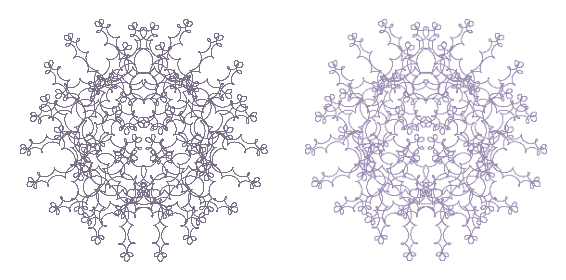

((3880, 288, 288, 3), (3880,), (3880, 2))

In [9]:
n=np.random.randint(labels.shape[0])
checkplot(n)
images.shape,labels.shape,targets.shape

In [10]:
classes=list(set(labels)); num_classes=len(classes)
rd=dict(zip(classes,list(range(len(classes)))))
labels=np.array([rd.get(x,x) for x in labels],
                dtype=np.int32)
rd,classes,list(set(labels))

({3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6},
 [3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6])

In [11]:
N=labels.shape[0]; n=int(.1*N)
shuffle_ids=np.arange(N)
np.random.RandomState(12).shuffle(shuffle_ids)
images=images[shuffle_ids]
labels=labels[shuffle_ids]
targets=targets[shuffle_ids]
x_test,x_valid,x_train=\
images[:n],images[n:2*n],images[2*n:]
y_test,y_valid,y_train=\
labels[:n],labels[n:2*n],labels[2*n:]
y_test2,y_valid2,y_train2=\
targets[:n],targets[n:2*n],targets[2*n:]

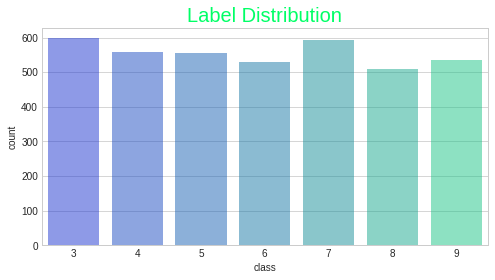

In [12]:
df=pd.DataFrame(labels,columns=['label'])
df['class']=[classes[l] for l in labels]
pl.figure(figsize=(8,4))
sn.countplot(x='class',data=df,palette='winter',alpha=.5)
ti='Label Distribution'
pl.title(ti,fontsize=20,color='#00ff66');

In [13]:
dhtml('Classification','#00ff66',f3,fs7)

In [14]:
%run ../input/python-recipes/base_cnn_model01.py

<Figure size 432x288 with 0 Axes>

In [15]:
base_conv2d=32; last_pool='avg'
cnn_model=base_cnn_model(
    base_conv2d,last_pool,num_classes,img_size)
history=cnn_model\
.fit(x_train,y_train,epochs=200,batch_size=64,
     verbose=2,validation_data=(x_valid,y_valid),
     callbacks=cb(model_weights))

Epoch 1/200

Epoch 00001: val_accuracy improved from -inf to 0.26289, saving model to /checkpoints
49/49 - 7s - loss: 1.9334 - accuracy: 0.1678 - val_loss: 1.8477 - val_accuracy: 0.2629
Epoch 2/200

Epoch 00002: val_accuracy did not improve from 0.26289
49/49 - 6s - loss: 1.8427 - accuracy: 0.2291 - val_loss: 1.8322 - val_accuracy: 0.2294
Epoch 3/200

Epoch 00003: val_accuracy improved from 0.26289 to 0.28351, saving model to /checkpoints
49/49 - 6s - loss: 1.8108 - accuracy: 0.2423 - val_loss: 1.7501 - val_accuracy: 0.2835
Epoch 4/200

Epoch 00004: val_accuracy did not improve from 0.28351
49/49 - 6s - loss: 1.7802 - accuracy: 0.2639 - val_loss: 1.8024 - val_accuracy: 0.2706
Epoch 5/200

Epoch 00005: val_accuracy improved from 0.28351 to 0.29124, saving model to /checkpoints
49/49 - 6s - loss: 1.7684 - accuracy: 0.2742 - val_loss: 1.7498 - val_accuracy: 0.2912
Epoch 6/200

Epoch 00006: val_accuracy did not improve from 0.29124
49/49 - 6s - loss: 1.7655 - accuracy: 0.2658 - val_loss: 1

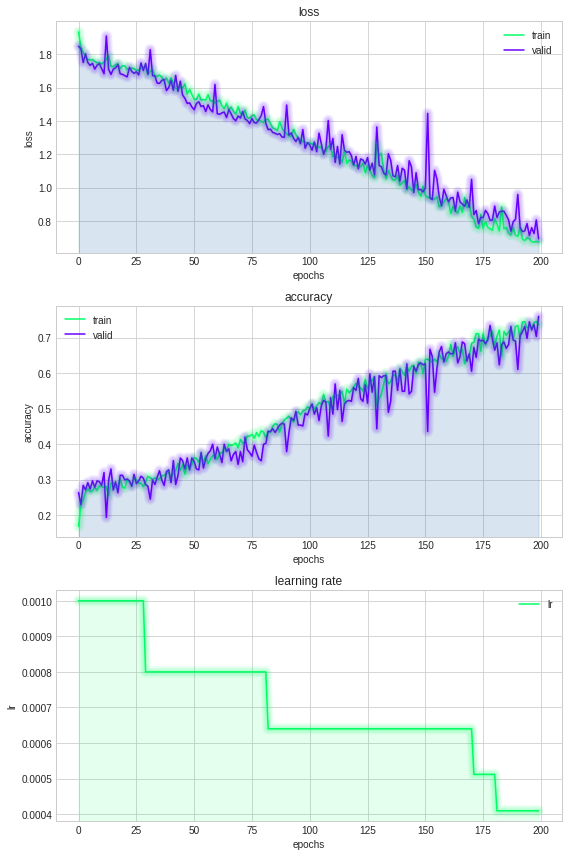

In [16]:
glow_history_plot(history)

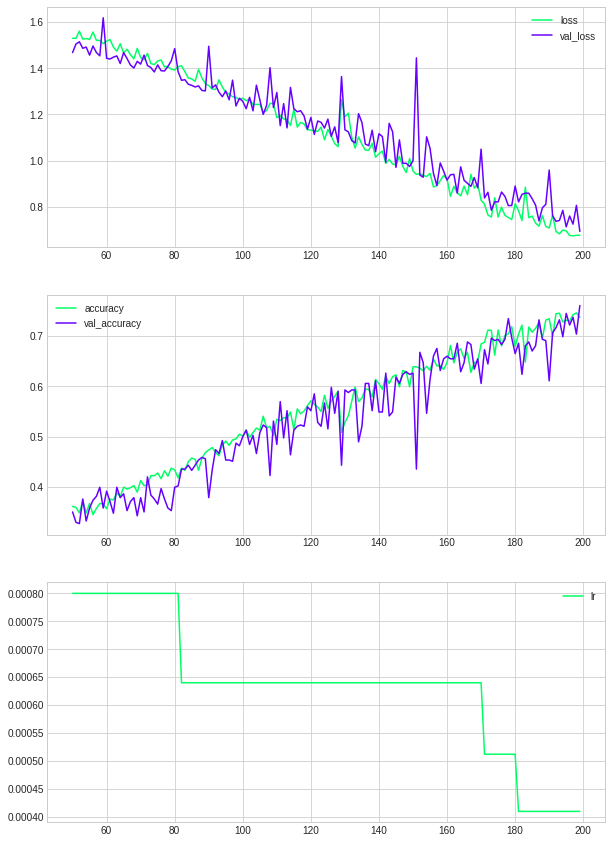

In [17]:
keras_history_plot(history,start=50,end=200)

In [18]:
df_history=pandas_history(history,True)
df_history.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,1.933370,0.167848,1.847735,0.262887,0.001
1,1.842715,0.229059,1.832248,0.229381,0.001
2,1.810764,0.242268,1.750140,0.283505,0.001
3,1.780175,0.263853,1.802446,0.270619,0.001
4,1.768373,0.274162,1.749817,0.291237,0.001


In [19]:
cnn_model.load_weights(model_weights)
cnn_model.evaluate(x_test,y_test,verbose=0)

[0.7025752663612366, 0.7216494679450989]